<a href="https://colab.research.google.com/github/harshapriyanka/MachineLearning/blob/master/SHALA-2020/Assignments/MachineLearning/L2/Assignment_ML_L2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import pandas as pd 
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/harshapriyanka/MachineLearning/master/SHALA-2020/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*   We have 5 categorical features.


In [5]:
target = titanic_data['Survived'].copy()
titanic_data = titanic_data.drop(['Survived'], axis=1);
titanic_data.shape

(891, 11)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_data, target, test_size=0.2, random_state=0)


In [7]:
test_data = pd.concat([x_test,y_test],axis=1)
test_data = pd.DataFrame(test_data)
test_data.shape

(179, 12)

In [8]:
train_data = pd.concat([x_train,y_train],axis=1)
train_data = pd.DataFrame(train_data)
train_data.shape

(712, 12)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          571 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        163 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,571.000000,712.000000,712.000000,712.00000,712.000000
mean,443.283708,2.317416,29.745184,0.529494,0.391854,31.86295,0.383427
std,260.003783,0.833767,14.619046,1.140842,0.821368,50.13531,0.486563
min,1.000000,1.000000,0.670000,0.000000,0.000000,0.00000,0.000000
25%,211.750000,2.000000,20.750000,0.000000,0.000000,7.91770,0.000000
50%,441.000000,3.000000,29.000000,0.000000,0.000000,14.45625,0.000000
75%,671.250000,3.000000,38.000000,1.000000,0.000000,31.27500,1.000000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000


In [11]:
md = train_data.isna().sum()
md_percent = train_data.isnull().sum()/train_data.isnull().count()*100
print(pd.concat([md, md_percent], axis=1, keys=['Total', '%']))

             Total          %
PassengerId      0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            141  19.803371
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          549  77.106742
Embarked         2   0.280899
Survived         0   0.000000


1.   'Embarked' has only two missing values.
2.   'Cabin' has almost 77% missing values. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe68f5f7320>,
      dtype=object)

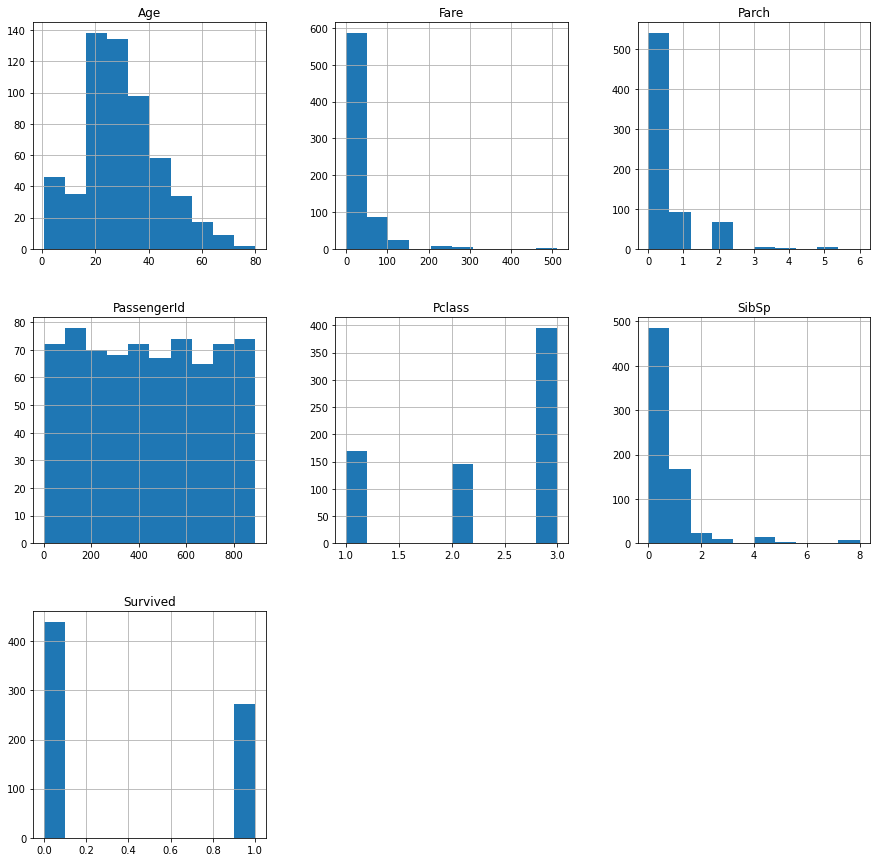

In [12]:
train_data.hist(figsize=(15,15))

In [15]:
print('Passenger ID is unique.') if train_data.PassengerId.nunique() == train_data.shape[0] else print('oops')

Passenger ID is unique.


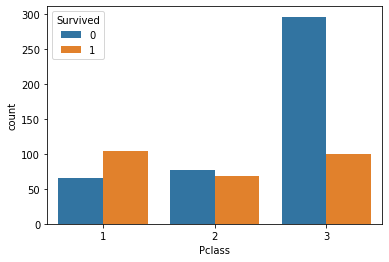

In [22]:
sns.countplot(x=train_data['Pclass'],data = train_data, hue = train_data['Survived'])


In [0]:
# print(train_data[['Pclass', 'Survived']].groupby(['Pclass']), as_index=False).mean().sort_values(by='Survived', ascending=False))